# 1. Intro and Flat Files

In [ ]:
# Open a file: file
file = open('moby_dick.txt', mode='r')#read only

# Print it
print(file.read())

# Check whether file is closed
print(file.closed)

# Close file
file.close()

# Check whether file is closed
print(file.closed)


In [ ]:

# Read & print the first 3 lines
with open('moby_dick.txt') as file:
    print(file.readline())
    print(file.readline())
    print(file.readline())

Flat files are basic text files containing records i.e. table data without structured relationships. Different from relational database where columns of distinct tables are related. 

Flat files- rows of fields/attributes, each contains AT MOST one item of information.  csv/txt are examples. first row can be columns attributing to features. 

5th ZEN OF PYTHON: Flat is better than nested

In [1]:
'''Importing via numpy: USE ONLY WHEN ALL DATA IS NUMERIC'''


'Importing via numpy: USE ONLY WHEN ALL DATA IS NUMERIC'

In [ ]:
# Import package
import numpy as np

# Assign filename to variable: file
file = 'digits.csv'

# Load file as array: digits
digits = np.loadtxt(file, delimiter=',')

# Print datatype of digits
print(type(digits))

# Select and reshape a row
im = digits[21, 1:]
im_sq = np.reshape(im, (28, 28))

# Plot reshaped data (matplotlib.pyplot already loaded as plt)
plt.imshow(im_sq, cmap='Greys', interpolation='nearest')
plt.show()


In [ ]:
'''more parameters to loadtxt'''
# Assign the filename: file
file = 'digits_header.txt'

# Load the data: data
data = np.loadtxt(file, delimiter='\t', skiprows=1, usecols=[0, 2])

In [ ]:
'''if data types are different'''
# Assign filename: file
file = 'seaslug.txt'

# Import file: data
data = np.loadtxt(file, delimiter='\t', dtype=str)

# Print the first element of data
print(data[0])#shows strings as [a,b] for first entry
 
# Import data as floats and skip the first row: data_float
data_float = np.loadtxt(file, delimiter='\t', dtype=float, skiprows=1)

# Print the 10th element of data_float
print(data_float[9])

# Plot a scatterplot of the data
plt.scatter(data_float[:, 0], data_float[:, 1])
plt.xlabel('time (min.)')
plt.ylabel('percentage of larvae')
plt.show()


In [ ]:
data = np.genfromtxt('titanic.csv', delimiter=',', names=True, dtype=None)

'''Here, the first argument is the filename, the second specifies the delimiter , 
and the third argument names tells us there is a header. Because the data are of 
different types, data is an object called a structured array. Because numpy arrays
have to contain elements that are all the same type, the structured array solves this
by being a 1D array, where each element of the array is a row of the flat file imported.
You can test this by checking out the array's shape in the shell by executing np.shape(data).'''

In [ ]:
'''another way of importing'''

# Assign the filename: file
file = 'titanic.csv'

# Import file using np.recfromcsv: d
d = np.recfromcsv(file)

'''here it has the defaults delimiter=',' and names=True in addition to dtype=None already 
so only file has to be passed'''

# Print out first three entries of d
print(d[:3])

In [ ]:
'''importing files using pandas'''
# Import pandas
import pandas as pd

# Assign the filename: file
file = 'titanic.csv'

# Read the file into a DataFrame: df
df = pd.read_csv(file)

In [ ]:
'''taking numpy array from pd dataframe'''

# Assign the filename: file
file = 'digits.csv'

# Read the first 5 rows of the file into a DataFrame: data
data = pd.read_csv(file, nrows=5, header=None)

# Build a numpy array from the DataFrame: data_array
data_array = data.values##<<<<<---- IMPORTANT

# Print the datatype of data_array to the shell
print(type(data_array))

In [ ]:
'customizing pandas import'

# Import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

# Assign filename: file
file = 'titanic_corrupt.txt'

# Import file: data
data = pd.read_csv(file, sep='\t', comment='#', na_values=['Nothing'])

# Print the head of the DataFrame
print(data.head())

'''comment and na_values arguments of pd.read_csv(). comment takes characters that comments occur 
after in the file, which in this case is '#'. na_values takes a list of strings to recognize as NA/NaN, 
in this case the string 'Nothing''''


# 2. IMPORTING OTHER FILE TYPES

There are a number of datatypes that cannot be saved easily to flat files, such as lists and dictionaries. If you want your files to be human readable, you may want to save them as text files in a clever manner. JSONs, which you will see in a later chapter, are appropriate for Python dictionaries.

However, if you merely want to be able to import them into Python, you can serialize them. All this means is converting the object into a sequence of bytes, or a bytestream.

In [ ]:
# Import pickle package
import pickle

# Open pickle file and load data
with open('data.pkl', 'rb') as file:
    d = pickle.load(file)

# Print data
print(d)

# Print datatype
print(type(d))

In [ ]:
'''loading excel files'''
# Import pandas
import pandas as pd

# Assign spreadsheet filename: file
file = 'battledeath.xlsx'

# Load spreadsheet: xls
xls = pd.ExcelFile(file)

# Print sheet names
print(xls.sheet_names)


In [ ]:
 '''importing sheets from Excel files'''

#Load a sheet into a DataFrame by name: df1
df1 = xls.parse('2004')

# Print the head of the DataFrame df1
print(df1.head())

# Load a sheet into a DataFrame by index: df2
df2 = xls.parse(0)#<<<<--- can import by index or by 

# Print the head of the DataFrame df2
print(df2.head())

In [ ]:
'''Customizing your spreadsheet import'''

# Parse the first sheet and rename the columns: df1
df1 = xls.parse(0, skiprows=[0], names=['Country', 'AAM due to War (2002)'])

# Parse the first column of the second sheet and rename the column: df2
df2 = xls.parse(1, usecols=[0], skiprows=[0], names=['Country'])


In [ ]:
'''importing SAS/Stata'''

# Import sas7bdat package
from sas7bdat import SAS7BDAT

# Save file to a DataFrame: df_sas
with SAS7BDAT('sales.sas7bdat') as file:
    df_sas = file.to_data_frame()


In [ ]:
'''reading stata'''
df = pd.read_stata('disarea.dta')


In [ ]:
'''importing HDF5 files'''#Hierarchical Format version 5
# Import packages
import numpy as np
import h5py

# Assign filename: file
file = 'LIGO_data.hdf5'

# Load file: data
data = h5py.File(file, 'r')

# Print the datatype of the loaded file
print(type(data))

# Print the keys of the file
for key in data.keys():'''keys are names of groups'''
    print(key)


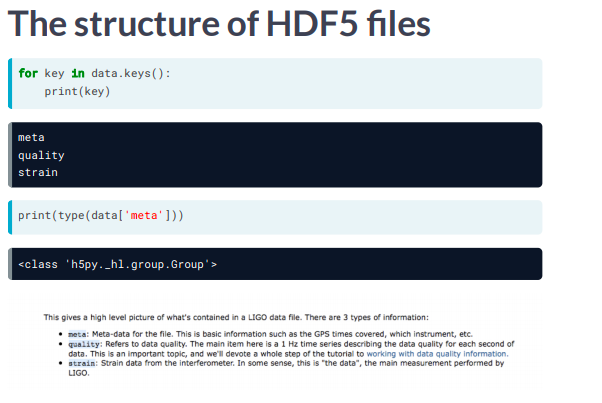

In [ ]:
# Get the HDF5 group: group
group = data['strain']

# Check out keys of group
for key in group.keys():
    print(key)

# Set variable equal to time series data: strain
strain = data['strain']['Strain'].value

# Set number of time points to sample: num_samples
num_samples = 10000

# Set time vector
time = np.arange(0, 1, 1/num_samples)

# Plot data
plt.plot(time, strain[:num_samples])
plt.xlabel('GPS Time (s)')
plt.ylabel('strain')
plt.show()

In [ ]:
'''MATLAB: MATRIX LABORATORY'''
# Import package
import scipy.io

# Load MATLAB file: mat
mat = scipy.io.loadmat('albeck_gene_expression.mat')

# 3. Importing Relational Databases

In [5]:
'''Using SQL Lite as an example'''

'''Creating a Database engine'''
# Import necessary module
from sqlalchemy import create_engine

# Create engine: engine
engine = create_engine('sqlite:///Chinook.sqlite')#mention database type and path only

# Save the table names to a list: table_names
table_names = engine.table_names()

# Print the table names to the shell
print(table_names)


[]


In [ ]:
'''querying'''

# Import packages
from sqlalchemy import create_engine
import pandas as pd

# Create engine: engine
engine = create_engine('sqlite:///Chinook.sqlite')

# Open engine connection
con = engine.connect()

# Perform query: rs
rs = con.execute("SELECT * FROM Album")

# Save results of the query to DataFrame: df
df = pd.DataFrame(rs.fetchall())

# Close connection
con.close()

# Print head of DataFrame df
print(df.head())


In [ ]:
with engine.connect() as con:
    rs = con.execute("SELECT LastName, Title FROM Employee")
    df = pd.DataFrame(rs.fetchmany(size=3))
    df.columns = rs.keys()

# Print the length of the DataFrame df
print(len(df))

# Print the head of the DataFrame df
print(df.head())

In [ ]:
# Create engine: engine
engine = create_engine('sqlite:///Chinook.sqlite')

# Open engine in context manager
# Perform query and save results to DataFrame: df
with engine.connect() as con:
    rs = con.execute("SELECT * FROM Employee WHERE EmployeeId >= 6")
    df = pd.DataFrame(rs.fetchall())
    df.columns = rs.keys()

# Print the head of the DataFrame df
print(df.head())

In [ ]:
# Create engine: engine
engine = create_engine('sqlite:///Chinook.sqlite')

# Open engine in context manager
with engine.connect() as con:
    rs = con.execute("SELECT * FROM Employee ORDER BY BirthDate")
    df = pd.DataFrame(rs.fetchall())

    # Set the DataFrame's column names
    df.columns = rs.keys()

# Print head of DataFrame
print(df.head())

In [ ]:
'''querying directly with pandas'''

# Import packages
from sqlalchemy import create_engine
import pandas as pd

# Create engine: engine
engine = create_engine('sqlite:///Chinook.sqlite')

# Execute query and store records in DataFrame: df
df = pd.read_sql_query("SELECT * FROM Album", engine)

# Print head of DataFrame
print(df.head())

# Open engine in context manager and store query result in df1
with engine.connect() as con:
    rs = con.execute("SELECT * FROM Album")
    df1 = pd.DataFrame(rs.fetchall())
    df1.columns = rs.keys()

# Confirm that both methods yield the same result
print(df.equals(df1))



In [ ]:
# Execute query and store records in DataFrame: df
df = pd.read_sql_query(
    "SELECT * FROM Employee WHERE EmployeeId >= 6 ORDER BY BirthDate",
    engine
)

In [ ]:
'''advanced querying'''

# Open engine in context manager
# Perform query and save results to DataFrame: df
with engine.connect() as con:
    rs = con.execute("SELECT Title, Name FROM Album INNER JOIN Artist on Album.ArtistID = Artist.ArtistID")
    df = pd.DataFrame(rs.fetchall())
    df.columns = rs.keys()

# Print head of DataFrame df
print(df.head())


In [ ]:
# Execute query and store records in DataFrame: df
df = pd.read_sql_query(
    "SELECT * FROM PlaylistTrack INNER JOIN Track ON PlaylistTrack.TrackId = Track.TrackId WHERE Milliseconds < 250000",
    engine
)

# Print head of DataFrame
print(df.head())

# 4. Importing Data from the Internet

In [7]:
# Import package
from urllib.request import urlretrieve

# Import pandas
import pandas as pd

# Assign url of file: url
url = 'https://s3.amazonaws.com/assets.datacamp.com/production/course_1606/datasets/winequality-red.csv'

# Save file locally
urlretrieve(url, 'winequality-red.csv')

# Read file into a DataFrame and print its head
df = pd.read_csv('winequality-red.csv', sep=';')
print(df.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

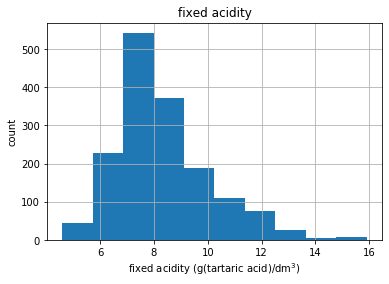

In [13]:
'''data can be loaded directly from the web into a pandas dataframe also'''

# Import packages
import matplotlib.pyplot as plt
import pandas as pd

# Assign url of file: url
url = 'https://s3.amazonaws.com/assets.datacamp.com/production/course_1606/datasets/winequality-red.csv'

# Read file into a DataFrame: df
df = pd.read_csv(url, sep=';')

# Print the head of the DataFrame
print(df.head())

# Plot first column of df
pd.DataFrame.hist(df.iloc[:, 0:1])
plt.xlabel('fixed acidity (g(tartaric acid)/dm$^3$)')
plt.ylabel('count')
plt.show()


In [ ]:
'''importing non-flat files from the web'''

# Import package
import pandas as pd

# Assign url of file: url
url = 'http://s3.amazonaws.com/assets.datacamp.com/course/importing_data_into_r/latitude.xls'

# Read in all sheets of Excel file: xls
xls = pd.read_excel(url, sheet_name=None)

# Print the sheetnames to the shell
print(xls.keys())

# Print the head of the first sheet (using its name, NOT its index)
print(xls['1700'].head())

In [ ]:
'''Importing HTML data'''

# Import packages
from urllib.request import urlopen, Request

# Specify the url
url = "http://www.datacamp.com/teach/documentation"

# This packages the request
request = Request(url)

# Sends the request and catches the response: response
response = urlopen(request)

# Print the datatype of response
print(type(response))#<---type is <class 'http.client.HTTPResponse'>

# Extract the response: html
html = response.read()

# Print the html
print(html)

# Be polite and close the response!
response.close()

In [14]:
'''SHORTER METHOD: PERFORMING HTTP REQUESTS USING REQUESTS LIBRARY'''

# Import package
import requests

# Specify the url: url
url = "http://www.datacamp.com/teach/documentation"

# Packages the request, send the request and catch the response: r
r = requests.get(url)

# Extract the response: text
text = r.text

# Print the html
print(text)

<!doctype html>
<html lang="en" data-direction="ltr">
  <head>
    <link href="https://fonts.intercomcdn.com" rel="preconnect" crossorigin>
      <script src="https://www.googletagmanager.com/gtag/js?id=UA-39297847-9" async="async" nonce="IBmSKb0l8iJEKzAzc8cK2mf4kpxVJ0koo3lYnAl36Gw="></script>
      <script nonce="IBmSKb0l8iJEKzAzc8cK2mf4kpxVJ0koo3lYnAl36Gw=">
        window.dataLayer = window.dataLayer || [];
        function gtag(){dataLayer.push(arguments);}
        gtag('js', new Date());
        gtag('config', 'UA-39297847-9');
</script>
    <meta charset="utf-8">
    <meta http-equiv="X-UA-Compatible" content="IE=edge">
    <title>DataCamp Help Center</title>
    <meta name="description" content="">
    <meta name="viewport" content="width=device-width, initial-scale=1">

      <link rel="alternate" href="http://instructor-support.datacamp.com/en/" hreflang="en">

      <meta name="intercom:trackingEvent" content="{&quot;name&quot;:&quot;Viewed Help Center&quot;,&quot;metadata&qu

HTML seems unstructures but has tags from which structtured data can be extracted. 

The Library beautiful soup allows users to "prettify" the html code in python and extract improtant information out of it such as 

In [16]:
'''SCRAPING WEB DATA WITH PYTHON'''

# Import packages
import requests
from bs4 import BeautifulSoup

# Specify url: url
url = 'https://www.python.org/~guido/'

# Package the request, send the request and catch the response: r
r = requests.get(url)

# Extracts the response as html: html_doc
html_doc = r.text

# Create a BeautifulSoup object from the HTML: soup
soup = BeautifulSoup(html_doc)

# Prettify the BeautifulSoup object: pretty_soup
pretty_soup = soup.prettify()

# Print the response
print(pretty_soup)

<html>
 <head>
  <title>
   Guido's Personal Home Page
  </title>
 </head>
 <body bgcolor="#FFFFFF" text="#000000">
  <h1>
   <a href="pics.html">
    <img border="0" src="images/IMG_2192.jpg"/>
   </a>
   Guido van Rossum - Personal Home Page
   <a href="pics.html">
    <img border="0" height="216" src="images/guido-headshot-2019.jpg" width="270"/>
   </a>
  </h1>
  <p>
   <a href="http://www.washingtonpost.com/wp-srv/business/longterm/microsoft/stories/1998/raymond120398.htm">
    <i>
     "Gawky and proud of it."
    </i>
   </a>
  </p>
  <h3>
   <a href="images/df20000406.jpg">
    Who I Am
   </a>
  </h3>
  <p>
   Read
my
   <a href="http://neopythonic.blogspot.com/2016/04/kings-day-speech.html">
    "King's
Day Speech"
   </a>
   for some inspiration.
  </p>
  <p>
   I am the author of the
   <a href="http://www.python.org">
    Python
   </a>
   programming language.  See also my
   <a href="Resume.html">
    resume
   </a>
   and my
   <a href="Publications.html">
    publicati

In [17]:
print(soup)
'''see the difference'''

<html>
<head>
<title>Guido's Personal Home Page</title>
</head>
<body bgcolor="#FFFFFF" text="#000000">
<h1>
<a href="pics.html"><img border="0" src="images/IMG_2192.jpg"/></a>
Guido van Rossum - Personal Home Page
<a href="pics.html"><img border="0" height="216" src="images/guido-headshot-2019.jpg" width="270"/></a>
</h1>
<p><a href="http://www.washingtonpost.com/wp-srv/business/longterm/microsoft/stories/1998/raymond120398.htm"><i>"Gawky and proud of it."</i></a>
</p><h3><a href="images/df20000406.jpg">Who I Am</a></h3>
<p>Read
my <a href="http://neopythonic.blogspot.com/2016/04/kings-day-speech.html">"King's
Day Speech"</a> for some inspiration.

</p><p>I am the author of the <a href="http://www.python.org">Python</a>
programming language.  See also my <a href="Resume.html">resume</a>
and my <a href="Publications.html">publications list</a>, a <a href="bio.html">brief bio</a>, assorted <a href="http://legacy.python.org/doc/essays/">writings</a>, <a href="http://legacy.python.org/doc

In [18]:
# Get the title of Guido's webpage: guido_title
guido_title = soup.title

# Print the title of Guido's webpage to the shell
print(guido_title)

# Get Guido's text: guido_text
guido_text = soup.get_text()

# Print Guido's text to the shell
print(guido_text)

<title>Guido's Personal Home Page</title>


Guido's Personal Home Page




Guido van Rossum - Personal Home Page


"Gawky and proud of it."
Who I Am
Read
my "King's
Day Speech" for some inspiration.

I am the author of the Python
programming language.  See also my resume
and my publications list, a brief bio, assorted writings, presentations and interviews (all about Python), some
pictures of me,
my new blog, and
my old
blog on Artima.com.  I am
@gvanrossum on Twitter.

I am retired, working on personal projects (and maybe a book).
I have worked for Dropbox, Google, Elemental Security, Zope
Corporation, BeOpen.com, CNRI, CWI, and SARA.  (See
my resume.)  I created Python while at CWI.

How to Reach Me
You can send email for me to guido (at) python.org.
I read everything sent there, but I receive too much email to respond
to everything.

My Name
My name often poses difficulties for Americans.

Pronunciation: in Dutch, the "G" in Guido is a hard G,
pronounced roughly like the "ch" in Sco

In [21]:
# Find all 'a' tags (which define hyperlinks): a_tags
a_tags = soup.find_all('a')

# Print the URLs to the shell
for link in a_tags:
    print(link.get('href'))

pics.html
pics.html
http://www.washingtonpost.com/wp-srv/business/longterm/microsoft/stories/1998/raymond120398.htm
images/df20000406.jpg
http://neopythonic.blogspot.com/2016/04/kings-day-speech.html
http://www.python.org
Resume.html
Publications.html
bio.html
http://legacy.python.org/doc/essays/
http://legacy.python.org/doc/essays/ppt/
interviews.html
pics.html
http://neopythonic.blogspot.com
http://www.artima.com/weblogs/index.jsp?blogger=12088
https://twitter.com/gvanrossum
Resume.html
guido.au
http://legacy.python.org/doc/essays/
images/license.jpg
http://www.cnpbagwell.com/audio-faq
http://sox.sourceforge.net/
images/internetdog.gif


# 5. Interacting with APIs to import data from the web

APIS are used standard ways of interacting with applications from which data is to be pulled. Example: using twitter API to stream twitter data in python.. 

JSON is JavaScript OBject Notation which is a standard form of transfering data through APIs. The JSON file format arose out of a growing need for real-time server-to-browser communication. JSON loaded in python is loaded as a dictionary. 

In [ ]:
'''loading and exploring json'''
# Load JSON: json_data
with open("a_movie.json") as json_file:
    json_data = json.load(json_file)

# Print each key-value pair in json_data
for k in json_data.keys():
    print(k + ': ', json_data[k])

In [23]:
'''APIS and interacting with WWW'''

# Import requests package
import requests

# Assign URL to variable: url
url = 'http://www.omdbapi.com/?apikey=72bc447a&t=the+social+network'

# Package the request, send the request and catch the response: r
r = requests.get(url)

# Print the text of the response
print(r.text)

{"Title":"The Social Network","Year":"2010","Rated":"PG-13","Released":"01 Oct 2010","Runtime":"120 min","Genre":"Biography, Drama","Director":"David Fincher","Writer":"Aaron Sorkin (screenplay), Ben Mezrich (book)","Actors":"Jesse Eisenberg, Rooney Mara, Bryan Barter, Dustin Fitzsimons","Plot":"As Harvard student Mark Zuckerberg creates the social networking site that would become known as Facebook, he is sued by the twins who claimed he stole their idea, and by the co-founder who was later squeezed out of the business.","Language":"English, French","Country":"USA","Awards":"Won 3 Oscars. Another 171 wins & 183 nominations.","Poster":"https://m.media-amazon.com/images/M/MV5BOGUyZDUxZjEtMmIzMC00MzlmLTg4MGItZWJmMzBhZjE0Mjc1XkEyXkFqcGdeQXVyMTMxODk2OTU@._V1_SX300.jpg","Ratings":[{"Source":"Internet Movie Database","Value":"7.7/10"},{"Source":"Rotten Tomatoes","Value":"96%"},{"Source":"Metacritic","Value":"95/100"}],"Metascore":"95","imdbRating":"7.7","imdbVotes":"599,526","imdbID":"tt1285

In [27]:
# Decode the JSON data into a dictionary: json_data
json_data = r.json()

for k in json_data.keys():
    print(k + ': ', json_data[k])

Title:  The Social Network
Year:  2010
Rated:  PG-13
Released:  01 Oct 2010
Runtime:  120 min
Genre:  Biography, Drama
Director:  David Fincher
Writer:  Aaron Sorkin (screenplay), Ben Mezrich (book)
Actors:  Jesse Eisenberg, Rooney Mara, Bryan Barter, Dustin Fitzsimons
Plot:  As Harvard student Mark Zuckerberg creates the social networking site that would become known as Facebook, he is sued by the twins who claimed he stole their idea, and by the co-founder who was later squeezed out of the business.
Language:  English, French
Country:  USA
Awards:  Won 3 Oscars. Another 171 wins & 183 nominations.
Poster:  https://m.media-amazon.com/images/M/MV5BOGUyZDUxZjEtMmIzMC00MzlmLTg4MGItZWJmMzBhZjE0Mjc1XkEyXkFqcGdeQXVyMTMxODk2OTU@._V1_SX300.jpg
Ratings:  [{'Source': 'Internet Movie Database', 'Value': '7.7/10'}, {'Source': 'Rotten Tomatoes', 'Value': '96%'}, {'Source': 'Metacritic', 'Value': '95/100'}]
Metascore:  95
imdbRating:  7.7
imdbVotes:  599,526
imdbID:  tt1285016
Type:  movie
DVD:  N/

In [36]:
# Import package
import requests

# Assign URL to variable: url
url = 'https://en.wikipedia.org/w/api.php?action=query&prop=extracts&format=json&exintro=&titles=pizza'

# Package the request, send the request and catch the response: r
r = requests.get(url)

# Decode the JSON data into a dictionary: json_data
json_data = r.json()

# Print the Wikipedia page extract
pizza_extract = json_data['query']['pages']['24768']['extract']
print(pizza_extract)


<p class="mw-empty-elt">
</p>

<p><b>Pizza</b> (<small>Italian: </small><span title="Representation in the International Phonetic Alphabet (IPA)">[ˈpittsa]</span>, <small>Neapolitan: </small><span title="Representation in the International Phonetic Alphabet (IPA)">[ˈpittsə]</span>) is a savory dish of Italian origin, consisting of a usually round, flattened base of leavened wheat-based dough topped with tomatoes, cheese, and often various other ingredients (anchovies, olives, meat, etc.) baked at a high temperature, traditionally in a wood-fired oven. A small pizza is sometimes called a pizzetta.
</p><p>In Italy, pizza served in formal settings, such as at a restaurant, is presented unsliced, and is eaten with the use of a knife and fork. In casual settings, however, it is cut into wedges to be eaten while held in the hand.
</p><p>The term <i>pizza</i> was first recorded in the 10th century in a Latin manuscript from the Southern Italian town of Gaeta in Lazio, on the border with Campa

# 5. Deep diving into Twitter API

In [43]:
# Import package
import tweepy

# Store OAuth authentication credentials in relevant variables
access_token = "1092294848-aHN7DcRP9B4VMTQIhwqOYiB14YkW92fFO8k8EPy"
access_token_secret = "X4dHmhPfaksHcQ7SCbmZa2oYBBVSD2g8uIHXsp5CTaksx"
consumer_key = "nZ6EA0FxZ293SxGNg8g8aP0HM"
consumer_secret = "fJGEodwe3KiKUnsYJC3VRndj7jevVvXbK2D5EiJ2nehafRgA6i"

# Pass OAuth details to tweepy's OAuth handler
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)


In [45]:
class MyStreamListener (tweepy.StreamListener):
    def __init__(self, api = None):
        super(MyStreamListener, self).__init__()
        self.num_tweets = 0
        self.file_name = "tweets.txt"
        #self.file = open("tweets.txt", "w")

    def on_status(self, status):
        tweet = status._json
        with open(self.file_name, 'a') as file:
            file.write(json.dumps(tweet) + '\n')
        self.num_tweets += 1
        if self.num_tweets < 100:
            return True
        else:
            return False

    def on_error(self, status):
        print(status)

NOTE: Above code is outdated. create mystreamlistner class first!

In [ ]:
# Initialize Stream listener
l = MyStreamListener()

# Create your Stream object with authentication
stream = tweepy.Stream(auth, l)

# Filter Twitter Streams to capture data by the keywords:
stream.filter(track=['clinton', 'trump', 'sanders', 'cruz'])

In [ ]:
# Import package
import json

# String of path to file: tweets_data_path
tweets_data_path = 'tweets.txt'

# Initialize empty list to store tweets: tweets_data
tweets_data = []

# Open connection to file
tweets_file = open(tweets_data_path, "r")

# Read in tweets and store in list: tweets_data
for line in tweets_file:
    tweet = json.loads(line)
    tweets_data.append(tweet)

# Close connection to file
tweets_file.close()

# Print the keys of the first tweet dict
print(tweets_data[0].keys())

In [ ]:
# Import package
import pandas as pd

# Build DataFrame of tweet texts and languages
df = pd.DataFrame(tweets_data, columns=['text', 'lang'])

# Print head of DataFrame
print(df.head())

In [ ]:
# Initialize list to store tweet counts
[clinton, trump, sanders, cruz] = [0, 0, 0, 0]

# Iterate through df, counting the number of tweets in which
# each candidate is mentioned
for index, row in df.iterrows():
    clinton += word_in_text('clinton', row['text'])
    trump += word_in_text('trump', row['text'])
    sanders += word_in_text('sanders', row['text'])
    cruz += word_in_text('cruz', row['text'])


In [ ]:
# Import packages
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style
sns.set(color_codes=True)

# Create a list of labels:cd
cd = ['clinton', 'trump', 'sanders', 'cruz']

# Plot the bar chart
ax = sns.barplot(cd, [clinton, trump, sanders, cruz])
ax.set(ylabel="count")
plt.show()